<a href="https://colab.research.google.com/github/MagicShow1999/NLP-final-project/blob/master/Annotation_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import psycopg2

In [4]:
df = pd.read_csv('ydata-ynacc-v1_0_expert_annotations.tsv',sep='\t')

df.dropna(inplace = True)
df.drop_duplicates(inplace= True)
df.head()


,sdid,commentindex,headline,url,guid,commentid,timestamp,thumbs-up,thumbs-down,text,parentid,constructiveclass,sd_agreement,sd_type,sentiment,tone,commentagreement,topic,intendedaudience,persuasiveness
4,135929,1,This Old Navy Ad Featuring an Interracial Fami...,http://mic.com/articles/142323/this-old-navy-a...,_TDnK715vO5y0OzZz_n4,00002I000000000000000000000000-7ef2ac58-bd84-4...,1.462205e+09,7.0,2.0,"Ya, I always wonder why the conservatives are ...",1462203719963-3eeffb02-faae-4b51-9174-704c57e6...,Not constructive,Agreement throughout,Off-topic/digression,neutral,Sarcastic,Agreement with commenter,Off-topic with article,Reply to a specific commenter,Not persuasive
90,136165,2,This Old Navy Ad Featuring an Interracial Fami...,http://mic.com/articles/142323/this-old-navy-a...,xwxtFkH~q4_aYQh7~kSh,00003b000000000000000000000000-171677d7-1b53-4...,1.462196e+09,1.0,6.0,"James , that is why you are afraid of Trump, y...",1462195395758-17011dc8-e1d7-4bad-a4a3-2ef3b888...,Not constructive,Continual disagreement,Argumentative (back and forth),negative,Sarcastic,Disagreement with commenter,Off-topic with article,Reply to a specific commenter,Not persuasive
131,135954,3,This Old Navy Ad Featuring an Interracial Fami...,http://mic.com/articles/142323/this-old-navy-a...,vxsF4MfGlkUtaC_QF1iU,00004n000000000000000000000000-e3979b34-9db1-4...,1.462199e+09,1.0,2.0,Explain to me how getting remarried has anythi...,1462198230313-58dca956-cea4-49dc-9b78-5141c5b3...,Not constructive,Continual disagreement,Flamewar (insulting),negative,"Mean,Sarcastic",Disagreement with commenter,Off-topic with article,Reply to a specific commenter,Not persuasive
132,135954,2,This Old Navy Ad Featuring an Interracial Fami...,http://mic.com/articles/142323/this-old-navy-a...,8UElnpqBtkuNcwOXzi0v,00003g000000000000000000000000-40303ad1-01d1-4...,1.462199e+09,2.0,3.0,You do realize people remarry after having kid...,1462198230313-58dca956-cea4-49dc-9b78-5141c5b3...,Not constructive,Continual disagreement,Flamewar (insulting),negative,Mean,Disagreement with commenter,Off-topic with article,Reply to a specific commenter,Not persuasive
139,128778,3,IT HAPPENED TO ME: The Guy Who Raped Me 10 Yea...,http://www.xojane.com/it-happened-to-me/rapist...,jzRQeuCLHGjj8GGqhYwo,00004n000000000000000000000000-71148dba-a2b4-4...,1.461420e+09,3.0,1.0,"Shut up Charles you nerd, get back in the dump...",1461418753343-cf74e315-6c24-4186-a8e3-5010ddac...,Not constructive,Continual disagreement,Flamewar (insulting),negative,Mean,Disagreement with commenter,"Off-topic with conversation,Off-topic with art...",Reply to a specific commenter,Not persuasive


In [17]:
df.columns.values

array(['sdid', 'commentindex', 'headline', 'url', 'guid', 'commentid',
       'timestamp', 'thumbs-up', 'thumbs-down', 'text', 'parentid',
       'constructiveclass', 'sd_agreement', 'sd_type', 'sentiment',
       'tone', 'commentagreement', 'topic', 'intendedaudience',
       'persuasiveness'], dtype=object)

In [238]:
print(df['constructiveclass'].unique())
print(df['sd_agreement'].unique())
print(df['sentiment'].unique())
print(df['intendedaudience'].unique())
print(df['persuasiveness'].unique())


['Not constructive' 'Constructive']
['Agreement throughout' 'Continual disagreement'
 'Initial agreement leading to disagreement'
 'Initial disagreement converging to agreement']
['neutral' 'negative' 'positive' 'mixed']
['Reply to a specific commenter' 'Broadcast message / general audience']
['Not persuasive' 'Persuasive']
['Agreement with commenter' 'Disagreement with commenter'
 'Adjunct opinion' 'Agreement with commenter,Adjunct opinion'
 'Agreement with commenter,Disagreement with commenter'
 'Disagreement with commenter,NA' 'Agreement with commenter,NA'
 'Disagreement with commenter,Adjunct opinion'
 'Disagreement with commenter,Adjunct opinion,NA' 'Adjunct opinion,NA']


In [240]:
ca_set = set()
for ca in df['commentagreement']:
  for word in ca.split(','):
    if word != 'NA':
      ca_set.add(word)
ca_set

{'Adjunct opinion', 'Agreement with commenter', 'Disagreement with commenter'}

In [19]:
tone_set = set()
for tone in df['tone']:
  for word in tone.split(','):
    if word != 'NA':
      tone_set.add(word)
tone_set

{'Controversial', 'Funny', 'Informative', 'Mean', 'Sarcastic', 'Sympathetic'}

In [20]:
sd_type_set = set()
for t in df['sd_type']:
  for word in t.split(','):
    if word != 'NA':
      sd_type_set.add(word)
sd_type_set


{'Argumentative (back and forth)',
 'Flamewar (insulting)',
 'Off-topic/digression',
 'Personal stories',
 'Positive/respectful',
 'Snarky/humorous'}

In [21]:
topic_set = set()
for topic in df['topic']:
  for word in topic.split(','):
    if word != 'NA':
      topic_set.add(word)
topic_set

{'Off-topic with article', 'Off-topic with conversation', 'Personal story'}

In [22]:
np.array(df['thumbs-up']).astype(np.float64).max()

44.0

In [23]:
np.array(df['thumbs-down']).astype(np.float64).max()

64.0

In [0]:
gcp = df[['text','constructiveclass','persuasiveness','sentiment']]
gcp = gcp.drop_duplicates()

In [25]:
gcp.describe()

,text,constructiveclass,persuasiveness,sentiment
count,1519,1519,1519,1519
unique,1259,2,2,4
top,"Ya, I always wonder why the conservatives are ...",Not constructive,Not persuasive,negative
freq,3,779,1267,968


In [291]:
from sklearn.metrics import matthews_corrcoef
tone_dict = {}
for i in tone_set:
  tone_dict[i] = []
tone_dict
type_dict = {}
for i in sd_type_set:
  type_dict[i] = []
type_dict
topic_dict = {}
for i in topic_set:
  topic_dict[i] = []
topic_dict
ca_dict = {}
for i in ca_set:
  ca_dict[i] = []
ca_dict


{'Adjunct opinion': [],
 'Agreement with commenter': [],
 'Disagreement with commenter': []}

In [292]:
target = df[['constructiveclass','persuasiveness','sentiment','sd_agreement','intendedaudience']]


for t in df['tone']:
  for s in tone_set:
    if s in t:
      tone_dict[s].append(1)
    else:
      tone_dict[s].append(0)
for k,v in tone_dict.items():
  target[k] = v

for t in df['sd_type']:
  for s in sd_type_set:
    if s in t:
      type_dict[s].append(1)
    else:
      type_dict[s].append(0)
for k,v in type_dict.items():
  target[k] = v

for t in df['commentagreement']:
  for s in ca_set:
    if s in t:
      ca_dict[s].append(1)
    else:
      ca_dict[s].append(0)
for k,v in ca_dict.items():
  target[k] = v

for t in df['topic']:
  for s in topic_set:
    if s in t:
      topic_dict[s].append(1)
    else:
      topic_dict[s].append(0)
for k,v in topic_dict.items():
  target[k] = v

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [293]:
target.sample(5)

,constructiveclass,persuasiveness,sentiment,sd_agreement,intendedaudience,Informative,Funny,Sympathetic,Mean,Sarcastic,Controversial,Personal stories,Off-topic/digression,Snarky/humorous,Flamewar (insulting),Positive/respectful,Argumentative (back and forth),Agreement with commenter,Disagreement with commenter,Adjunct opinion,Off-topic with article,Personal story,Off-topic with conversation
509,Not constructive,Not persuasive,negative,Continual disagreement,Reply to a specific commenter,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1
15543,Not constructive,Not persuasive,negative,Continual disagreement,Reply to a specific commenter,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
13866,Constructive,Not persuasive,negative,Continual disagreement,Reply to a specific commenter,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
18188,Not constructive,Not persuasive,positive,Agreement throughout,Broadcast message / general audience,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
5382,Not constructive,Not persuasive,negative,Initial agreement leading to disagreement,Reply to a specific commenter,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0


In [294]:


dumm = pd.get_dummies(target)

dumm.head()

,Informative,Funny,Sympathetic,Mean,Sarcastic,Controversial,Personal stories,Off-topic/digression,Snarky/humorous,Flamewar (insulting),Positive/respectful,Argumentative (back and forth),Agreement with commenter,Disagreement with commenter,Adjunct opinion,Off-topic with article,Personal story,Off-topic with conversation,constructiveclass_Constructive,constructiveclass_Not constructive,persuasiveness_Not persuasive,persuasiveness_Persuasive,sentiment_mixed,sentiment_negative,sentiment_neutral,sentiment_positive,sd_agreement_Agreement throughout,sd_agreement_Continual disagreement,sd_agreement_Initial agreement leading to disagreement,sd_agreement_Initial disagreement converging to agreement,intendedaudience_Broadcast message / general audience,intendedaudience_Reply to a specific commenter
4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1
90,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
131,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
132,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
139,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1


In [295]:
#defining popularity
focus_popularity = df['thumbs-up'] + df['thumbs-down']
popularity = [1 if x > np.median(focus_popularity) else 0 for x in focus_popularity]
dumm['popularity'] = popularity
dumm['Likeness'] = df['thumbs-up'] - df['thumbs-down']
dumm['Likeness'] = [1  if x > 0 else 0 for x in dumm['Likeness']]
dumm['Dis_Likeness'] = [1  if x <= 0 else 0 for x in dumm['Likeness']]
dumm.head()

,Informative,Funny,Sympathetic,Mean,Sarcastic,Controversial,Personal stories,Off-topic/digression,Snarky/humorous,Flamewar (insulting),Positive/respectful,Argumentative (back and forth),Agreement with commenter,Disagreement with commenter,Adjunct opinion,Off-topic with article,Personal story,Off-topic with conversation,constructiveclass_Constructive,constructiveclass_Not constructive,persuasiveness_Not persuasive,persuasiveness_Persuasive,sentiment_mixed,sentiment_negative,sentiment_neutral,sentiment_positive,sd_agreement_Agreement throughout,sd_agreement_Continual disagreement,sd_agreement_Initial agreement leading to disagreement,sd_agreement_Initial disagreement converging to agreement,intendedaudience_Broadcast message / general audience,intendedaudience_Reply to a specific commenter,popularity,Likeness,Dis_Likeness
4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0
90,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1
131,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
132,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
139,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0


In [296]:


dumm.columns = ['Informative','Funny','Sympathetic','Mean','Sarcastic','Controversial',
                'Personal stories','Off-topic/digression','Snarky/humorous','Flamewar_insulting','Respectful','Argumentative_(back and forth)',
                'Agree with commenter','Disagree with commenter','Adjunct opinion',
                'Off-topic with article','Personal story','Off-topic with conversation',
                '(ERIC Thread)Constructive','(nonERIC Thread)Not_constructive',
                'Not_persuasive','Persuasive',
                'mixed','negative','neutral','positive',
                'Agreement_throughout','Continual_disagreement','Initial_agreement_leading_to_disagreement','Initial_disagreement_converging_to_agreement',
                'Broadcast message / general audience','Reply_to_specific',
                'Popularity','Likeness','Dis_Likeness']
dumm = dumm[['(ERIC Thread)Constructive','(nonERIC Thread)Not_constructive',
                       'Personal stories','Off-topic/digression','Snarky/humorous','Flamewar_insulting','Respectful','Argumentative_(back and forth)',
                       'Agreement_throughout','Continual_disagreement','Initial_agreement_leading_to_disagreement','Initial_disagreement_converging_to_agreement',
                       'Agree with commenter','Disagree with commenter','Adjunct opinion',
                'Off-topic with article','Personal story','Off-topic with conversation',
                 'Not_persuasive','Persuasive',
                'mixed','negative','neutral','positive',
                'Broadcast message / general audience','Reply_to_specific',
                'Popularity','Likeness','Dis_Likeness'
                       ]]

dumm.head(5)

,(ERIC Thread)Constructive,(nonERIC Thread)Not_constructive,Personal stories,Off-topic/digression,Snarky/humorous,Flamewar_insulting,Respectful,Argumentative_(back and forth),Agreement_throughout,Continual_disagreement,Initial_agreement_leading_to_disagreement,Initial_disagreement_converging_to_agreement,Agree with commenter,Disagree with commenter,Adjunct opinion,Off-topic with article,Personal story,Off-topic with conversation,Not_persuasive,Persuasive,mixed,negative,neutral,positive,Broadcast message / general audience,Reply_to_specific,Popularity,Likeness,Dis_Likeness
4,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1,0
90,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1
131,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
132,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
139,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0


In [297]:
dumm_corr = dumm.corr(method = 'pearson')

dumm_corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True)).set_precision(5)

,(ERIC Thread)Constructive,(nonERIC Thread)Not_constructive,Personal stories,Off-topic/digression,Snarky/humorous,Flamewar_insulting,Respectful,Argumentative_(back and forth),Agreement_throughout,Continual_disagreement,Initial_agreement_leading_to_disagreement,Initial_disagreement_converging_to_agreement,Agree with commenter,Disagree with commenter,Adjunct opinion,Off-topic with article,Personal story,Off-topic with conversation,Not_persuasive,Persuasive,mixed,negative,neutral,positive,Broadcast message / general audience,Reply_to_specific,Popularity,Likeness,Dis_Likeness
(ERIC Thread)Constructive,1.00000,-1.00000,0.13465,-0.15871,-0.12363,-0.38413,0.19006,0.25228,0.02563,-0.12391,0.08201,0.10086,0.03717,-0.08972,0.07893,-0.12304,0.13641,-0.04589,-0.18303,0.18303,0.12209,-0.16976,0.06140,0.06730,0.05508,-0.05508,0.00623,0.01493,-0.01493
(nonERIC Thread)Not_constructive,-1.00000,1.00000,-0.13465,0.15871,0.12363,0.38413,-0.19006,-0.25228,-0.02563,0.12391,-0.08201,-0.10086,-0.03717,0.08972,-0.07893,0.12304,-0.13641,0.04589,0.18303,-0.18303,-0.12209,0.16976,-0.06140,-0.06730,-0.05508,0.05508,-0.00623,-0.01493,0.01493
Personal stories,0.13465,-0.13465,1.00000,0.01300,0.13026,-0.09350,0.04098,-0.08756,0.14243,-0.23395,0.22926,0.00064,0.08705,-0.14408,0.12180,-0.27164,0.28678,-0.02889,-0.06605,0.06605,0.07788,-0.08492,0.02528,0.01671,0.10336,-0.10336,0.01383,0.00038,-0.00038
Off-topic/digression,-0.15871,0.15871,0.01300,1.00000,0.03618,0.01280,-0.09542,-0.23433,0.02899,-0.07399,0.07641,0.01466,0.04134,-0.05953,0.05558,0.07062,-0.08447,0.10748,0.02088,-0.02088,0.02191,-0.04179,0.05559,-0.02526,0.04548,-0.04548,-0.01224,0.04767,-0.04767
Snarky/humorous,-0.12363,0.12363,0.13026,0.03618,1.00000,-0.01560,-0.06114,-0.13542,0.09646,-0.10731,0.02538,0.05022,0.04303,-0.05786,0.09195,-0.00819,-0.00918,-0.02407,0.02842,-0.02842,0.00317,-0.03083,0.00955,0.04166,0.02057,-0.02057,0.00050,-0.02508,0.02508
Flamewar_insulting,-0.38413,0.38413,-0.09350,0.01280,-0.01560,1.00000,-0.14804,-0.32332,-0.06706,0.11742,-0.05671,-0.06849,-0.08248,0.15096,-0.07106,0.14773,-0.13799,0.05527,0.07659,-0.07659,-0.07753,0.16171,-0.08416,-0.08586,-0.05791,0.05791,-0.00789,-0.07899,0.07899
Respectful,0.19006,-0.19006,0.04098,-0.09542,-0.06114,-0.14804,1.00000,-0.21611,0.21672,-0.31698,0.19136,0.10204,0.12869,-0.15776,0.06512,-0.16702,0.16373,-0.01701,-0.10034,0.10034,-0.00734,-0.17716,0.06477,0.26294,0.03192,-0.03192,0.04687,0.11538,-0.11538
Argumentative_(back and forth),0.25228,-0.25228,-0.08756,-0.23433,-0.13542,-0.32332,-0.21611,1.00000,-0.23812,0.15968,-0.00852,0.00375,-0.09966,0.07417,0.04301,0.07086,-0.11324,0.04542,-0.04674,0.04674,0.19311,-0.05705,-0.03126,-0.12725,0.04326,-0.04326,0.04717,-0.03140,0.03140
Agreement_throughout,0.02563,-0.02563,0.14243,0.02899,0.09646,-0.06706,0.21672,-0.23812,1.00000,-0.58973,-0.06014,-0.05523,0.22762,-0.26620,0.09698,-0.08279,0.07263,0.01733,-0.02278,0.02278,-0.02233,-0.06725,0.05003,0.09425,0.11454,-0.11454,0.05686,0.07653,-0.07653
Continual_disagreement,-0.12391,0.12391,-0.23395,-0.07399,-0.10731,0.11742,-0.31698,0.15968,-0.58973,1.00000,-0.54204,-0.49786,-0.25911,0.30382,-0.11841,0.12359,-0.10695,-0.00825,0.06607,-0.06607,0.00978,0.13782,-0.08488,-0.16478,-0.09711,0.09711,-0.05070,-0.06734,0.06734


In [0]:
con_corr = dumm_corr[['(ERIC Thread)Constructive','(nonERIC Thread)Not_constructive']].drop(['(ERIC Thread)Constructive','(nonERIC Thread)Not_constructive'], axis=0)


,(ERIC Thread)Constructive,(nonERIC Thread)Not_constructive
Personal stories,0.134654,-0.134654
Off-topic/digression,-0.158710,0.158710
Snarky/humorous,-0.123627,0.123627
Flamewar_insulting,-0.384132,0.384132
Respectful,0.190065,-0.190065
Argumentative_(back and forth),0.252278,-0.252278
Agreement_throughout,0.025632,-0.025632
Continual_disagreement,-0.123905,0.123905
Initial_agreement_leading_to_disagreement,0.082006,-0.082006
Initial_disagreement_converging_to_agreement,0.100859,-0.100859


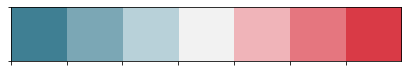

In [299]:
sns.palplot(sns.diverging_palette(220, 10, n=7))

con_corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True)).set_properties(**{'font-size': '0pt'})

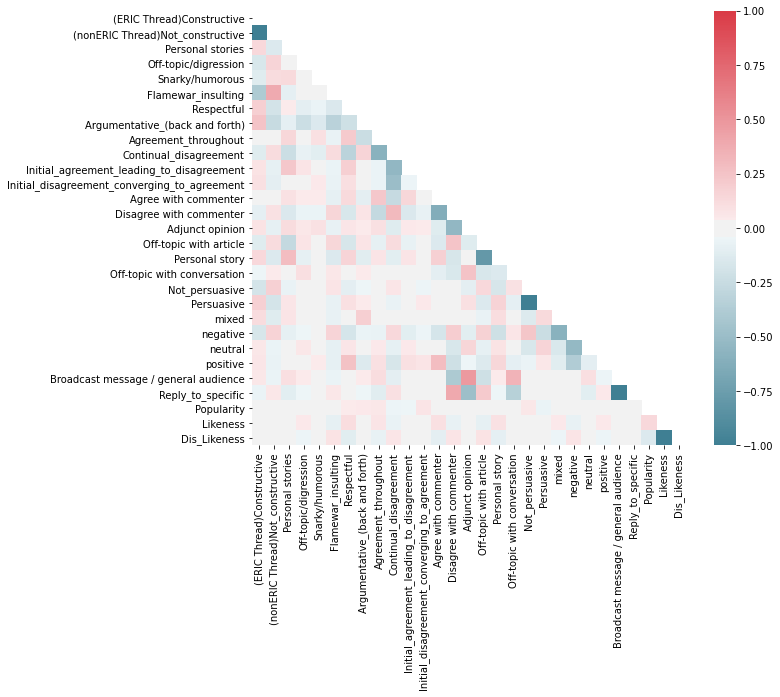

In [300]:
f, ax = plt.subplots(figsize=(10, 8))
mask=np.zeros_like(dumm_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dumm_corr, vmax = 1,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, mask = mask,ax=ax)

